In [2]:
import numpy as np
import gym
from matplotlib import pyplot as plt
from tiles3 import tiles, IHT 

In [3]:
def action_selector(actions, values, epsilon):
    """ An epsilon-greedy action selector.
        Give list of actions, assumed values for each action,
            and probability of NOT acting greedily.
    """
    greedy = np.random.choice([1,0], p=[1-epsilon, epsilon])
    if greedy:
        return actions[np.argmax(values)] 
    else:
        return np.random.choice(actions)
    

    
def feature_maker(observation, action, o_dim, a_dim):
    phi = np.zeros(o_dim * a_dim)
    phi[action*o_dim: (action+1)*o_dim] = observation
    phi /= 255  # scale to [0,1].  Just guessing here.
    return phi

In [4]:
n_episodes = 300

n_tilings = 10
tiling_dim = 40
max_tile_size = 65536 # ?? how to pick
iht = IHT(max_tile_size)

env = gym.make('MsPacman-ram-v0')
n_action = env.action_space.n
obs_dim = 128  # 128 byte ram from atari
obs_highs = env.observation_space.high
obs_lows = env.observation_space.low
scales = [tiling_dim / (obs_highs[i] - obs_lows[i]) for i in range(len(obs_highs))]

# init weights
theta = np.zeros(max_tile_size *  n_action) # concatenate per action


def mytiles(pt, a):
        """ pt, point in observation space
            a, an action
            Returns features for this state-action pair
        """
        pt_ = np.array([p*scales[i] for i,p in enumerate(list(pt))])
        features = list(np.array(tiles(iht, n_tilings, pt_)) + a * max_tile_size)
        phi = np.zeros_like(theta)
        phi[features] = 1
        return phi



n_timesteps = 1500
epsilon = .2 # (greedy)
gamma = .99
lam = .9
alpha = .1
actions = range(env.action_space.n)
render = False
verbose = True

# Run the learning loop

In [6]:
rewards = []
for i_episode in range(n_episodes):
    epsilon *= .92
    epsilon = max(epsilon, .04)
    observation = env.reset()

    # Choose an action espilon-greedily

    phis = [mytiles(observation, a) for a in actions] # get features for observation
    q_vals = [theta.dot(phi) for phi in phis]
    action = action_selector(actions, q_vals, epsilon)
    phi_sa = phis[action]
    q_sa = q_vals[action]

    # initialize e = 0
    e = np.zeros_like(theta)
    
    total_r = 0

#     for t in range(n_timesteps):
    done = False
    t=0
    while not done:
        if render: env.render()

        # Take action, observe change, choose new a, get new features and q_sa_ and do update
        observation, reward, done, info = env.step(action)
        total_r += reward

        # Choose next action epsilon-greedily
        phis = [mytiles(observation, a) for a in actions]
        q_vals = [theta.dot(phi) for phi in phis]
        action = action_selector(actions, q_vals, epsilon)
        phi_sa_ = phis[action]
        q_sa_ = q_vals[action]

        # Perform updates
        d = reward + gamma * q_sa_ - q_sa
        e = gamma * lam * e + alpha * (1 - gamma * lam * e.dot(phi_sa)) * phi_sa
        theta = theta + d * e + alpha * (q_sa - theta.dot(phi_sa)) * phi_sa


        q_sa = q_sa_
        phi_sa = phi_sa_

        t += 1
        if done:
            rewards.append(total_r)
#             if t+1 % 5 == 0:
            if verbose: print("Episode {} finished after {} timesteps with total reward {}".format(i_episode, t+1, total_r))
            break

env.close()

Episode 0 finished after 380 timesteps with total reward 140.0
Episode 1 finished after 639 timesteps with total reward 330.0
Episode 2 finished after 572 timesteps with total reward 180.0
Episode 3 finished after 643 timesteps with total reward 290.0
Episode 4 finished after 735 timesteps with total reward 350.0
Episode 5 finished after 481 timesteps with total reward 120.0
Episode 6 finished after 363 timesteps with total reward 140.0
Episode 7 finished after 635 timesteps with total reward 250.0
Episode 8 finished after 742 timesteps with total reward 250.0
Episode 9 finished after 624 timesteps with total reward 160.0
Episode 10 finished after 485 timesteps with total reward 130.0
IHT full, starting to allow collisions
Episode 11 finished after 971 timesteps with total reward 380.0
Episode 12 finished after 572 timesteps with total reward 260.0
Episode 13 finished after 923 timesteps with total reward 1010.0
Episode 14 finished after 522 timesteps with total reward 260.0
Episode 15

Episode 128 finished after 673 timesteps with total reward 330.0
Episode 129 finished after 570 timesteps with total reward 120.0
Episode 130 finished after 648 timesteps with total reward 240.0
Episode 131 finished after 562 timesteps with total reward 200.0
Episode 132 finished after 1078 timesteps with total reward 640.0
Episode 133 finished after 639 timesteps with total reward 180.0
Episode 134 finished after 934 timesteps with total reward 390.0
Episode 135 finished after 1068 timesteps with total reward 450.0
Episode 136 finished after 416 timesteps with total reward 210.0
Episode 137 finished after 484 timesteps with total reward 140.0
Episode 138 finished after 703 timesteps with total reward 260.0
Episode 139 finished after 499 timesteps with total reward 230.0
Episode 140 finished after 705 timesteps with total reward 210.0
Episode 141 finished after 820 timesteps with total reward 350.0
Episode 142 finished after 516 timesteps with total reward 290.0
Episode 143 finished af

KeyboardInterrupt: 

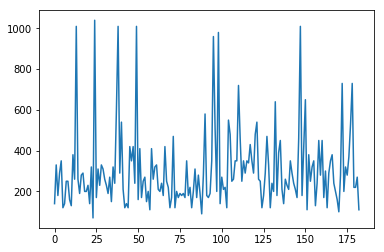

In [7]:
plt.plot(rewards)
plt.savefig('pacman_scores_tiling_bigger-tiles.png')

In [ ]:
env.action_space.n * 128

In [ ]:
env.

In [1]:
16384*4

65536

In [ ]:
180/40